### Apply KMeans clustering on the Employee_income.xlsx dataset and identify exact clusters using Elbow method to model the algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

C:\Users\Rakesh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load data
df = pd.read_excel('Employee_income.xlsx')

In [3]:
df.head()

,Name,Age,Income
0,Amit,27,70000
1,Akash,29,90000
2,Shriya,29,61000
3,Anita,28,62000
4,Sudhir,42,155000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>]], dtype=object)

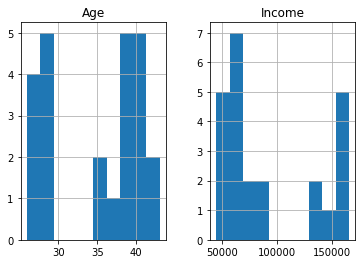

In [4]:
df.hist()

In [5]:
X = df[['Age','Income']]

In [6]:
X[:3]

,Age,Income
0,27,70000
1,29,90000
2,29,61000


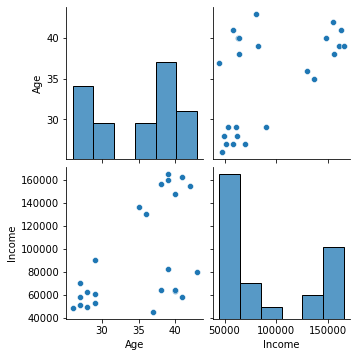

In [7]:
import seaborn as sns
sns.pairplot(X)

In [8]:
#from sklearn.cluster import KMeans

In [9]:
# choose 3 cluster
model = KMeans(n_clusters=3)

In [10]:
model

KMeans(n_clusters=3)

In [11]:
#training: only X is used
model.fit(X)

KMeans(n_clusters=3)

In [12]:
X[:3]

,Age,Income
0,27,70000
1,29,90000
2,29,61000


In [13]:
model.labels_ # output clusters

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0,
       0, 1])

In [16]:
model

KMeans(n_clusters=3)

In [17]:
# 3 centroids= 3 Clusters
model.cluster_centers_

array([[3.2500e+01, 5.6375e+04],
       [3.8750e+01, 1.5150e+05],
       [3.4500e+01, 8.0500e+04]])

In [18]:
model.cluster_centers_[:,0] #age data

array([32.5 , 38.75, 34.5 ])

In [19]:
model.cluster_centers_[:,1] #income data

array([ 56375., 151500.,  80500.])

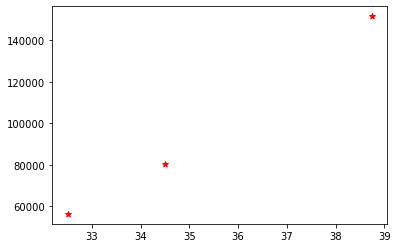

In [20]:
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='red',marker='*')

In [21]:
#Testing phase
model.fit_predict(X)

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0,
       0, 1])

In [22]:
X[:2]

,Age,Income
0,27,70000
1,29,90000


In [23]:
X['cluster']= model.fit_predict(X)

In [24]:
X

,Age,Income,cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,62000,0
4,42,155000,1
5,39,160000,1
6,41,162000,1
7,38,156000,1
8,36,130000,1
9,35,136000,1


In [25]:
X.shape

(24, 3)

In [26]:
df1 = X[X['cluster']==0]
df2 = X[X['cluster']==1]
df3 = X[X['cluster']==2]

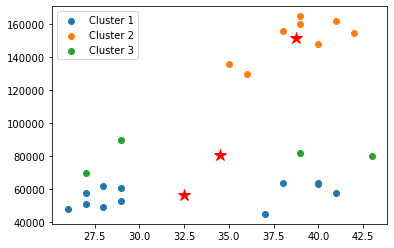

In [27]:
# Input data
plt.scatter(df1['Age'],df1['Income'],label='Cluster 1')
plt.scatter(df2['Age'],df2['Income'],label='Cluster 2')
plt.scatter(df3['Age'],df3['Income'],label='Cluster 3')
# Cluster centroids
plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='red',marker='*',markersize=12,linestyle=' ')
plt.legend()

In [28]:
X[:3]

,Age,Income,cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0


In [29]:
 #Scaling is required for age and Income also
scaler = MinMaxScaler()#normalizer [0-1]
# mimax= X - min(x)/max(x)-min(x)
df['Income']=scaler.fit_transform(df[['Income']])


df['Age']=scaler.fit_transform(df[['Age']])

In [30]:
df

,Name,Age,Income
0,Amit,0.058824,0.208333
1,Akash,0.176471,0.375000
2,Shriya,0.176471,0.133333
3,Anita,0.117647,0.141667
4,Sudhir,0.941176,0.916667
5,Gajanan,0.764706,0.958333
6,Ranjit,0.882353,0.975000
7,Jyotsna,0.705882,0.925000
8,Nitish,0.588235,0.708333
9,Onkar,0.529412,0.758333


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>]], dtype=object)

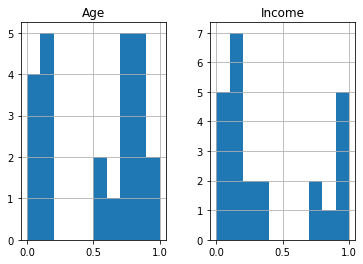

In [31]:
df.hist()

In [32]:
km = KMeans(n_clusters=3)

In [33]:
# age and Income are now Normalized
y_pred = km.fit_predict(df[['Age','Income']])

In [34]:
km.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2,
       1, 0])

In [35]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2,
       1, 0])

In [36]:
df['Cluster']=y_pred

In [37]:
df[:3]

,Name,Age,Income,Cluster
0,Amit,0.058824,0.208333,1
1,Akash,0.176471,0.375000,1
2,Shriya,0.176471,0.133333,1


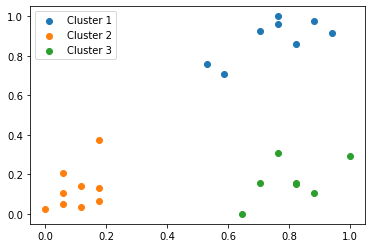

In [38]:
#Plotting after scaling
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]


plt.scatter(df1['Age'],df1['Income'],label='Cluster 1')
plt.scatter(df2['Age'],df2['Income'],label='Cluster 2')
plt.scatter(df3['Age'],df3['Income'],label='Cluster 3')
plt.legend()

In [39]:
#check the centroids of cluster
km.cluster_centers_

array([[0.75      , 0.8875    ],
       [0.10457516, 0.12731481],
       [0.80672269, 0.16785714]])

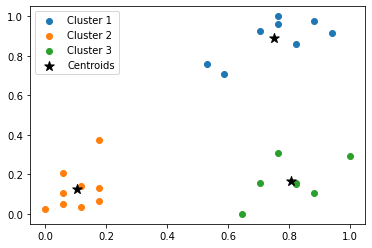

In [40]:
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]


plt.scatter(df1['Age'],df1['Income'],label='Cluster 1')
plt.scatter(df2['Age'],df2['Income'],label='Cluster 2')
plt.scatter(df3['Age'],df3['Income'],label='Cluster 3')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,marker='*',color='black',label='Centroids')

plt.legend()

In [45]:
model

KMeans(n_clusters=3)

In [46]:
km.predict([[19,100]])
# remeber at the time testing also u must have to scale data

AttributeError: 'NoneType' object has no attribute 'split'

In [47]:
test_data = df[['Age','Income']].sample(5)
test_data

,Age,Income
9,0.529412,0.758333
22,0.058824,0.108333
21,0.705882,0.158333
13,0.117647,0.037500
8,0.588235,0.708333


In [48]:
km.predict(test_data)

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

# WCSS

In [49]:
km

KMeans(n_clusters=3)

In [50]:
km.inertia_ #WCSS

0.4920193431403063

In [51]:
X = X[['Age','Income']]

In [52]:
wcss = []
for i in range(1,11):#i will take 1 to 10 cluster
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
wcss

In [ ]:
#check elbow
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linestyle='',marker='*',color='k')

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
X[:3]

In [ ]:
new = KMeans(n_clusters=3)

In [ ]:
new.fit(X)

In [ ]:
new.labels_

In [ ]:
silhouette_score(X,new.labels_)

In [ ]:
score = []
for i in range(2,6):
    new = KMeans(n_clusters=i)
    new.fit(X)
    print((silhouette_score(X,new.labels_)))
'''
score.append(silhouette_score(X,new.labels_))
print(score)
'''

#### 06/7432e1